In [1]:
from __future__ import absolute_import 
from __future__ import division
from __future__ import print_function

from model.newdeconv import DeconvNet
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
STEPS_PER_EPOCH = 100
BATCH_SIZE = 32

path_train   = '/Users/inchanji/GoogleDrive/cnn/mymodel/mnistNet/data/'
path_model  = '/Users/inchanji/GoogleDrive/cnn/mymodel/mnistNet/mnistNet_deconv.hdf5'

# train

In [5]:



deconv = DeconvNet()
model  = deconv.build_model(print_summary = True, batch_size = BATCH_SIZE)

trX, trY, teX, teY  = deconv.read_train_data(path_train,  train_sample_ratio = 0.66, 
                                trainfolder = 'trainingSet', segfolder = 'trainingSetSeg')



building network
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (32, 28, 28, 1)           0         
_________________________________________________________________
conv1-1 (Conv2D)             (32, 28, 28, 16)          144       
_________________________________________________________________
batchnorm1-1 (BatchNormaliza (32, 28, 28, 16)          64        
_________________________________________________________________
relu1-1 (Activation)         (32, 28, 28, 16)          0         
_________________________________________________________________
conv1-2 (Conv2D)             (32, 28, 28, 16)          2304      
_________________________________________________________________
batchnorm1-2 (BatchNormaliza (32, 28, 28, 16)          64        
_________________________________________________________________
relu1-2 (Activation)         (32, 28, 28, 16)          0   

In [6]:
print('TRAIN DATA X:', np.shape(trX))
print('TRAIN DATA Y:', np.shape(trY))
print('TEST DATA X:', np.shape(teX))
print('TEST DATA Y:', np.shape(teY))

TRAIN DATA X: (27712, 28, 28, 1)
TRAIN DATA Y: (27712, 28, 28, 11)
TEST DATA X: (14272, 28, 28, 1)
TEST DATA Y: (14272, 28, 28, 11)


In [7]:
deconv.train(STEPS_PER_EPOCH, epochs = 30, saveto = path_model)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/30
100/100 [==============================] - 94s 942ms/step - loss: 42.1524 - acc: 0.6839 - mean_squared_error: 0.0478 - val_loss: 57.8309 - val_acc: 0.7558 - val_mean_squared_error: 0.0680
Epoch 2/30
100/100 [==============================] - 89s 885ms/step - loss: 17.4151 - acc: 0.8817 - mean_squared_error: 0.0183 - val_loss: 36.7679 - val_acc: 0.8023 - val_mean_squared_error: 0.0388
Epoch 3/30
100/100 [==============================] - 87s 872ms/step - loss: 9.0295 - acc: 0.9458 - mean_squared_error: 0.0094 - val_loss: 27.4557 - val_acc: 0.8161 - val_mean_squared_error: 0.0229
Epoch 4/30
100/100 [==============================] - 92s 915ms/step - loss: 5.8682 - acc: 0.9627 - mean_squared_error: 0.0062 - val_loss: 28.0952 - val_acc: 0.8255 - val_mean_squared_error: 0.0218
Epoch 5/30
100/100 [==============================] - 87s 873ms/step - loss: 4.4

Epoch 25/30
100/100 [==============================] - 87s 874ms/step - loss: 2.5023 - acc: 0.9809 - mean_squared_error: 0.0028 - val_loss: 42.5723 - val_acc: 0.8340 - val_mean_squared_error: 0.0244
Epoch 26/30
100/100 [==============================] - 87s 865ms/step - loss: 2.2008 - acc: 0.9823 - mean_squared_error: 0.0026 - val_loss: 46.6721 - val_acc: 0.8322 - val_mean_squared_error: 0.0256
Epoch 27/30
100/100 [==============================] - 88s 876ms/step - loss: 2.2916 - acc: 0.9816 - mean_squared_error: 0.0027 - val_loss: 47.6630 - val_acc: 0.8315 - val_mean_squared_error: 0.0254
Epoch 28/30
100/100 [==============================] - 87s 873ms/step - loss: 2.2278 - acc: 0.9824 - mean_squared_error: 0.0026 - val_loss: 44.8040 - val_acc: 0.8327 - val_mean_squared_error: 0.0252
Epoch 29/30
100/100 [==============================] - 88s 879ms/step - loss: 2.6843 - acc: 0.9798 - mean_squared_error: 0.0030 - val_loss: 45.4571 - val_acc: 0.8304 - val_mean_squared_error: 0.0249
Epoch

# Inference

In [3]:
infer = DeconvNet()
infer.build_model(print_summary = True, batch_size = BATCH_SIZE)

building network
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (32, 28, 28, 1)           0         
_________________________________________________________________
conv1-1 (Conv2D)             (32, 28, 28, 16)          144       
_________________________________________________________________
batchnorm1-1 (BatchNormaliza (32, 28, 28, 16)          64        
_________________________________________________________________
relu1-1 (Activation)         (32, 28, 28, 16)          0         
_________________________________________________________________
conv1-2 (Conv2D)             (32, 28, 28, 16)          2304      
_________________________________________________________________
batchnorm1-2 (BatchNormaliza (32, 28, 28, 16)          64        
_____________________________________________________

In [4]:
infer.load(path_model)

In [134]:
imgpath = '/Users/inchanji/GoogleDrive/cnn/mymodel/mnistNet/data/testSet/img_60.jpg'


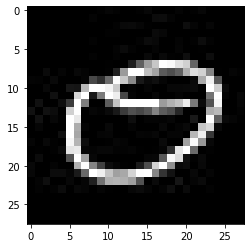

(28, 28, 3)

In [135]:
img0 = cv2.imread(imgpath)
plt.imshow(img0)
plt.show()
np.shape(img0)

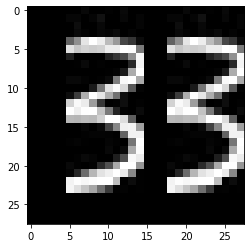

In [112]:
img2 = img0.copy()
img2[:,:,:] = 0
img2[:,5:15,:] = img0[:,10:20,:]
img2[:,18:,:] = img0[:,10:20,:]
plt.imshow(img2)
plt.show()

In [136]:
imgInfer = np.zeros((BATCH_SIZE, 28, 28, 1))
img = np.array(img0[:,:,0], dtype = 'float32')
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
img /= 255
img = np.expand_dims(img, axis=2)
img = np.expand_dims(img, axis=0)
imgInfer[0] = img 
pred  = infer.predict(imgInfer)[0]

In [137]:
pred = pred

out 	= np.zeros((28, 28), dtype = np.int)
for i in range(28):
    for j in range(28):
        idx 	= int(np.argmax(pred[i,j,:]))
        out[i,j] = idx


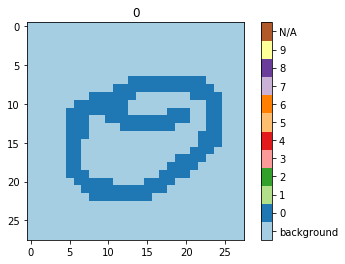

In [138]:
label = ['background', '0','1','2','3','4','5','6','7','8','9','N/A']
title = label[ int(np.median(out[np.where(np.array(out) > 0)]))]

fig, ax = plt.subplots()
plt.title(title)
cax = ax.imshow(out, cmap = 'Paired', vmin = -0.5, vmax = 11.5)
cbar = fig.colorbar(cax, ticks=np.arange(12), orientation='vertical')
cbar.ax.set_yticklabels(label) 
plt.show()

In [78]:
np.median(out[np.where(np.array(out) > 0)])

2.0

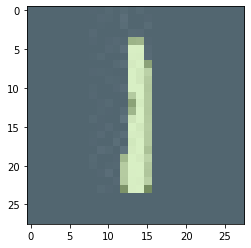

In [79]:
plt.imshow(img0)
plt.imshow(out, cmap = 'Paired', vmin = -0.5, vmax = 11.5, alpha= 0.5)
plt.show()

In [80]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])